### 1. Gaussian analysis

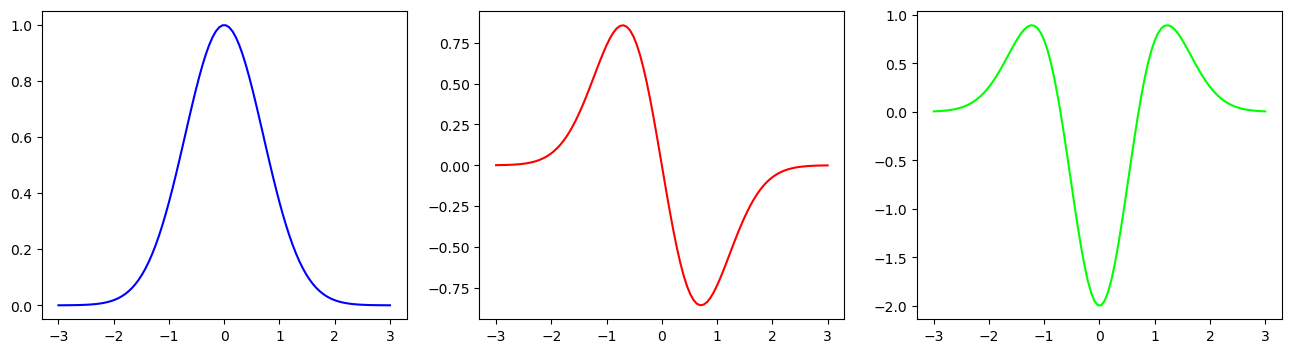

In [18]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 100)

def f(x):
    return np.exp(-x**2)

def df(x):
    return -2 * x * np.exp(-x**2)

def df2(x):
    return (4 * x**2 - 2) * np.exp(-x**2)

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(X, f(X), color='blue')

plt.subplot(1, 3, 2)
plt.plot(X, df(X), color='red')

plt.subplot(1, 3, 3)
plt.plot(X, df2(X), color='lime')

plt.show()


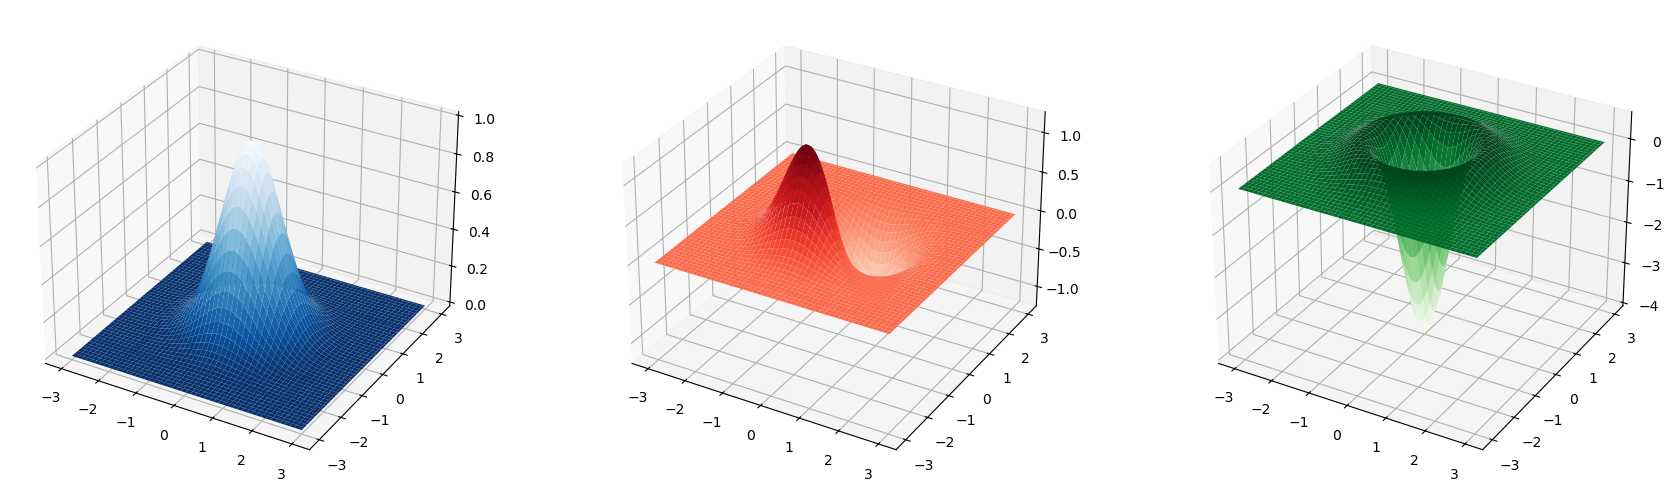

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(X, Y)

def f(x, y):
    return np.exp(-(x**2 + y**2))

def df(x, y):
    return -2 * x * np.exp(-(x**2 + y**2)) -2 * y * np.exp(-(x**2 + y**2))

def df2(x, y):
    return (4 * x**2 - 2) * np.exp(-(x**2 + y**2)) + (4 * y**2 - 2) * np.exp(-(x**2 + y**2))

Z1 = f(X, Y)
Z2 = df(X, Y)
Z3 = df2(X, Y)

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='Blues_r')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='Reds')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z3, cmap='Greens')

plt.tight_layout()
plt.show()


### 2. Analyse données Baptiste

#### .TIF

(1448, 1320, 3)
(1448, 1320, 3)
(10, 1448, 1320)
(10, 1448, 1320)


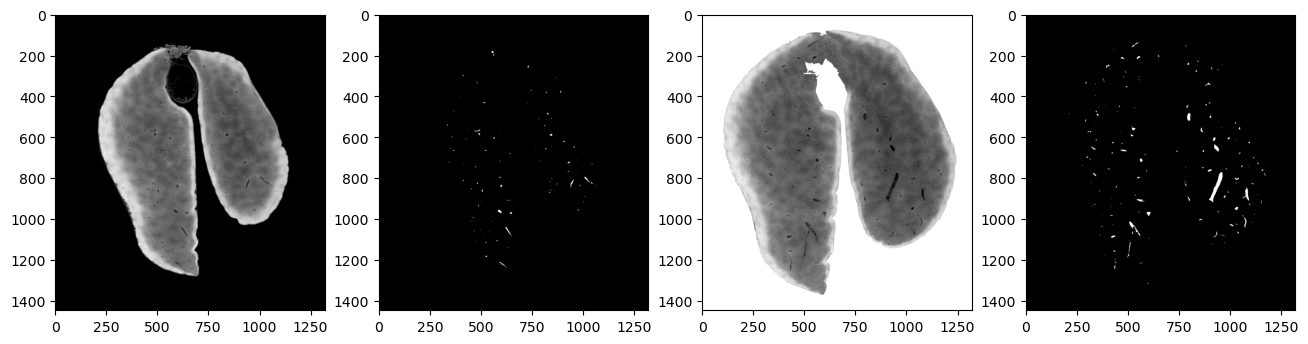

In [2]:
from skimage import io
import matplotlib.pyplot as plt

images1 = io.imread('./data/draft/NewData_A.tif')
images2 = io.imread('./data/draft/NewData_GT_A.tif')
images3 = io.imread('./data/draft/NewData_B.tiff')
images4 = io.imread('./data/draft/NewData_GT_B.tif')

print(images1.shape)
print(images2.shape)
print(images3.shape)
print(images4.shape)

i=2
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(images1[:, :, i], cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(images2[:, :, i], cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(images3[i, :, :], cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(images4[i, :, :], cmap='gray')

#### .NII

(1320, 1448, 3, 1)
(1320, 1448, 3, 1)
(1320, 1448, 10, 1)
(1320, 1448, 10, 1)


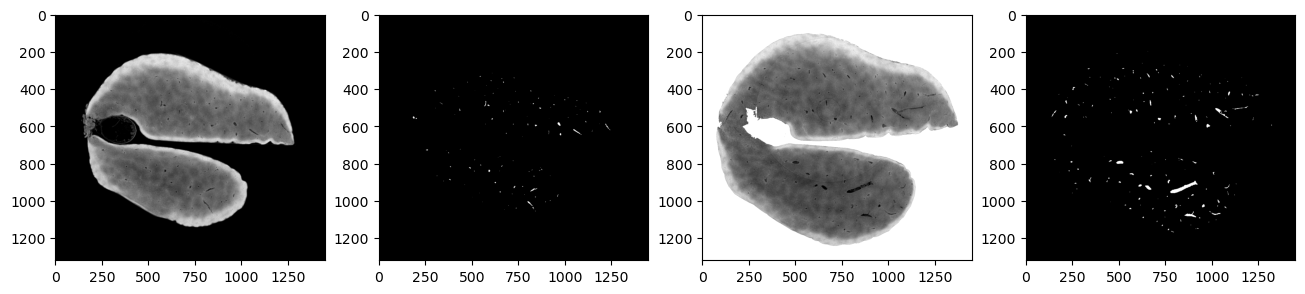

In [3]:
import nibabel as nib
import matplotlib.pyplot as plt

images1 = nib.load('./data/baptiste/NewData_A.nii').get_fdata()
images2 = nib.load('./data/baptiste/NewData_GT_A.nii').get_fdata()
images3 = nib.load('./data/baptiste/NewData_B.nii').get_fdata()
images4 = nib.load('./data/baptiste/NewData_GT_B.nii').get_fdata()

print(images1.shape)
print(images2.shape)
print(images3.shape)
print(images4.shape)

i=2
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(images1[:, :, i], cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(images2[:, :, i], cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(images3[:, :, i], cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(images4[:, :, i], cmap='gray')

#### .TIF - .NII

(1448, 1320, 3)
(1448, 1320, 3)
(10, 1448, 1320)
(10, 1448, 1320)


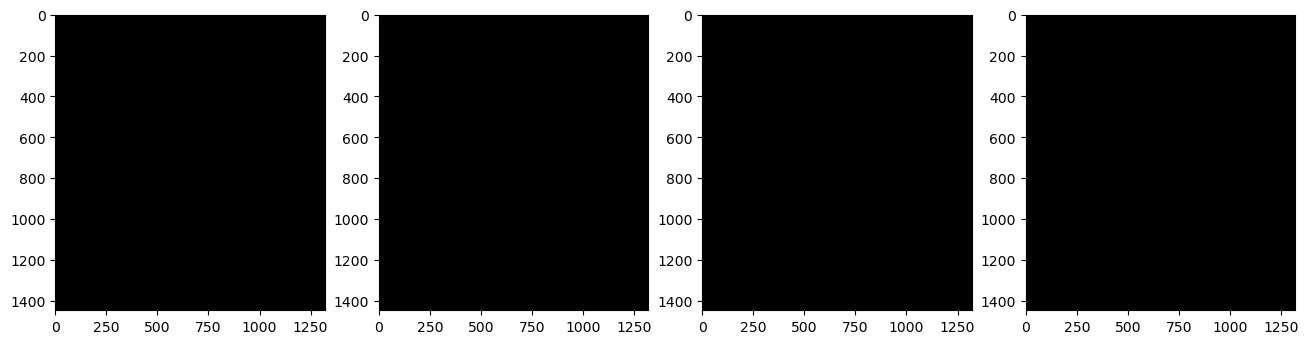

In [93]:
from skimage import io

images9 = io.imread('./data/raw/Data_A.tif')
images10 = io.imread('./data/raw/GT_A.tif')
images11 = io.imread('./data/raw/Data_B.tiff')
images12 = io.imread('./data/raw/GT_B.tif')

images5 = io.imread('./data/draft/NewData_A.tif')
images6 = io.imread('./data/draft/NewData_GT_A.tif')
images7 = io.imread('./data/draft/NewData_B.tiff')
images8 = io.imread('./data/draft/NewData_GT_B.tif')

images1 = images5 - images9
images2 = images6 - images10
images3 = images7 - images11
images4 = images8 - images12

print(images1.shape)
print(images2.shape)
print(images3.shape)
print(images4.shape)

i=2
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(images1[:, :, i], cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(images2[:, :, i], cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(images3[i, :, :], cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(images4[i, :, :], cmap='gray')

#### Visualisation 3D

In [ ]:
from src.frangi import frangi_filter
from skimage.filters import frangi
from utils.loader import load, save

filename = './data/raw/Data_B.tiff'
image = load(filename)
filtered_image1 = frangi_filter(-image, scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=15)
filtered_image2 = frangi_filter(image, scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=15)
filtered_image3 = frangi(-image, sigmas=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=15)
filtered_image4 = frangi(image, sigmas=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=15)

save(filtered_image1, './data/test/filtered_image1.nii')
save(filtered_image2, './data/test/filtered_image2.nii')
save(filtered_image3, './data/test/filtered_image3.nii')
save(filtered_image4, './data/test/filtered_image4.nii')

Loading file Data_B ...
File Data_B loaded ! Volume shape: (1320, 1448, 10).
Saving file ./data/test/filtered_image1 ...
File ./data/test/filtered_image1 saved!
Saving file ./data/test/filtered_image2 ...
File ./data/test/filtered_image2 saved!
Saving file ./data/test/filtered_image3 ...
File ./data/test/filtered_image3 saved!
Saving file ./data/test/filtered_image4 ...
File ./data/test/filtered_image4 saved!


Loading file Data_B ...
File Data_B loaded ! Volume shape: (1320, 1448, 10).
Loading file GT_B ...
File GT_B loaded ! Volume shape: (1320, 1448, 10).
Loading file filtered_image1 ...
File filtered_image1 loaded ! Volume shape: (1320, 1448, 10).
Loading file filtered_image2 ...
File filtered_image2 loaded ! Volume shape: (1320, 1448, 10).
Loading file filtered_image3 ...
File filtered_image3 loaded ! Volume shape: (1320, 1448, 10).
Loading file filtered_image4 ...
File filtered_image4 loaded ! Volume shape: (1320, 1448, 10).


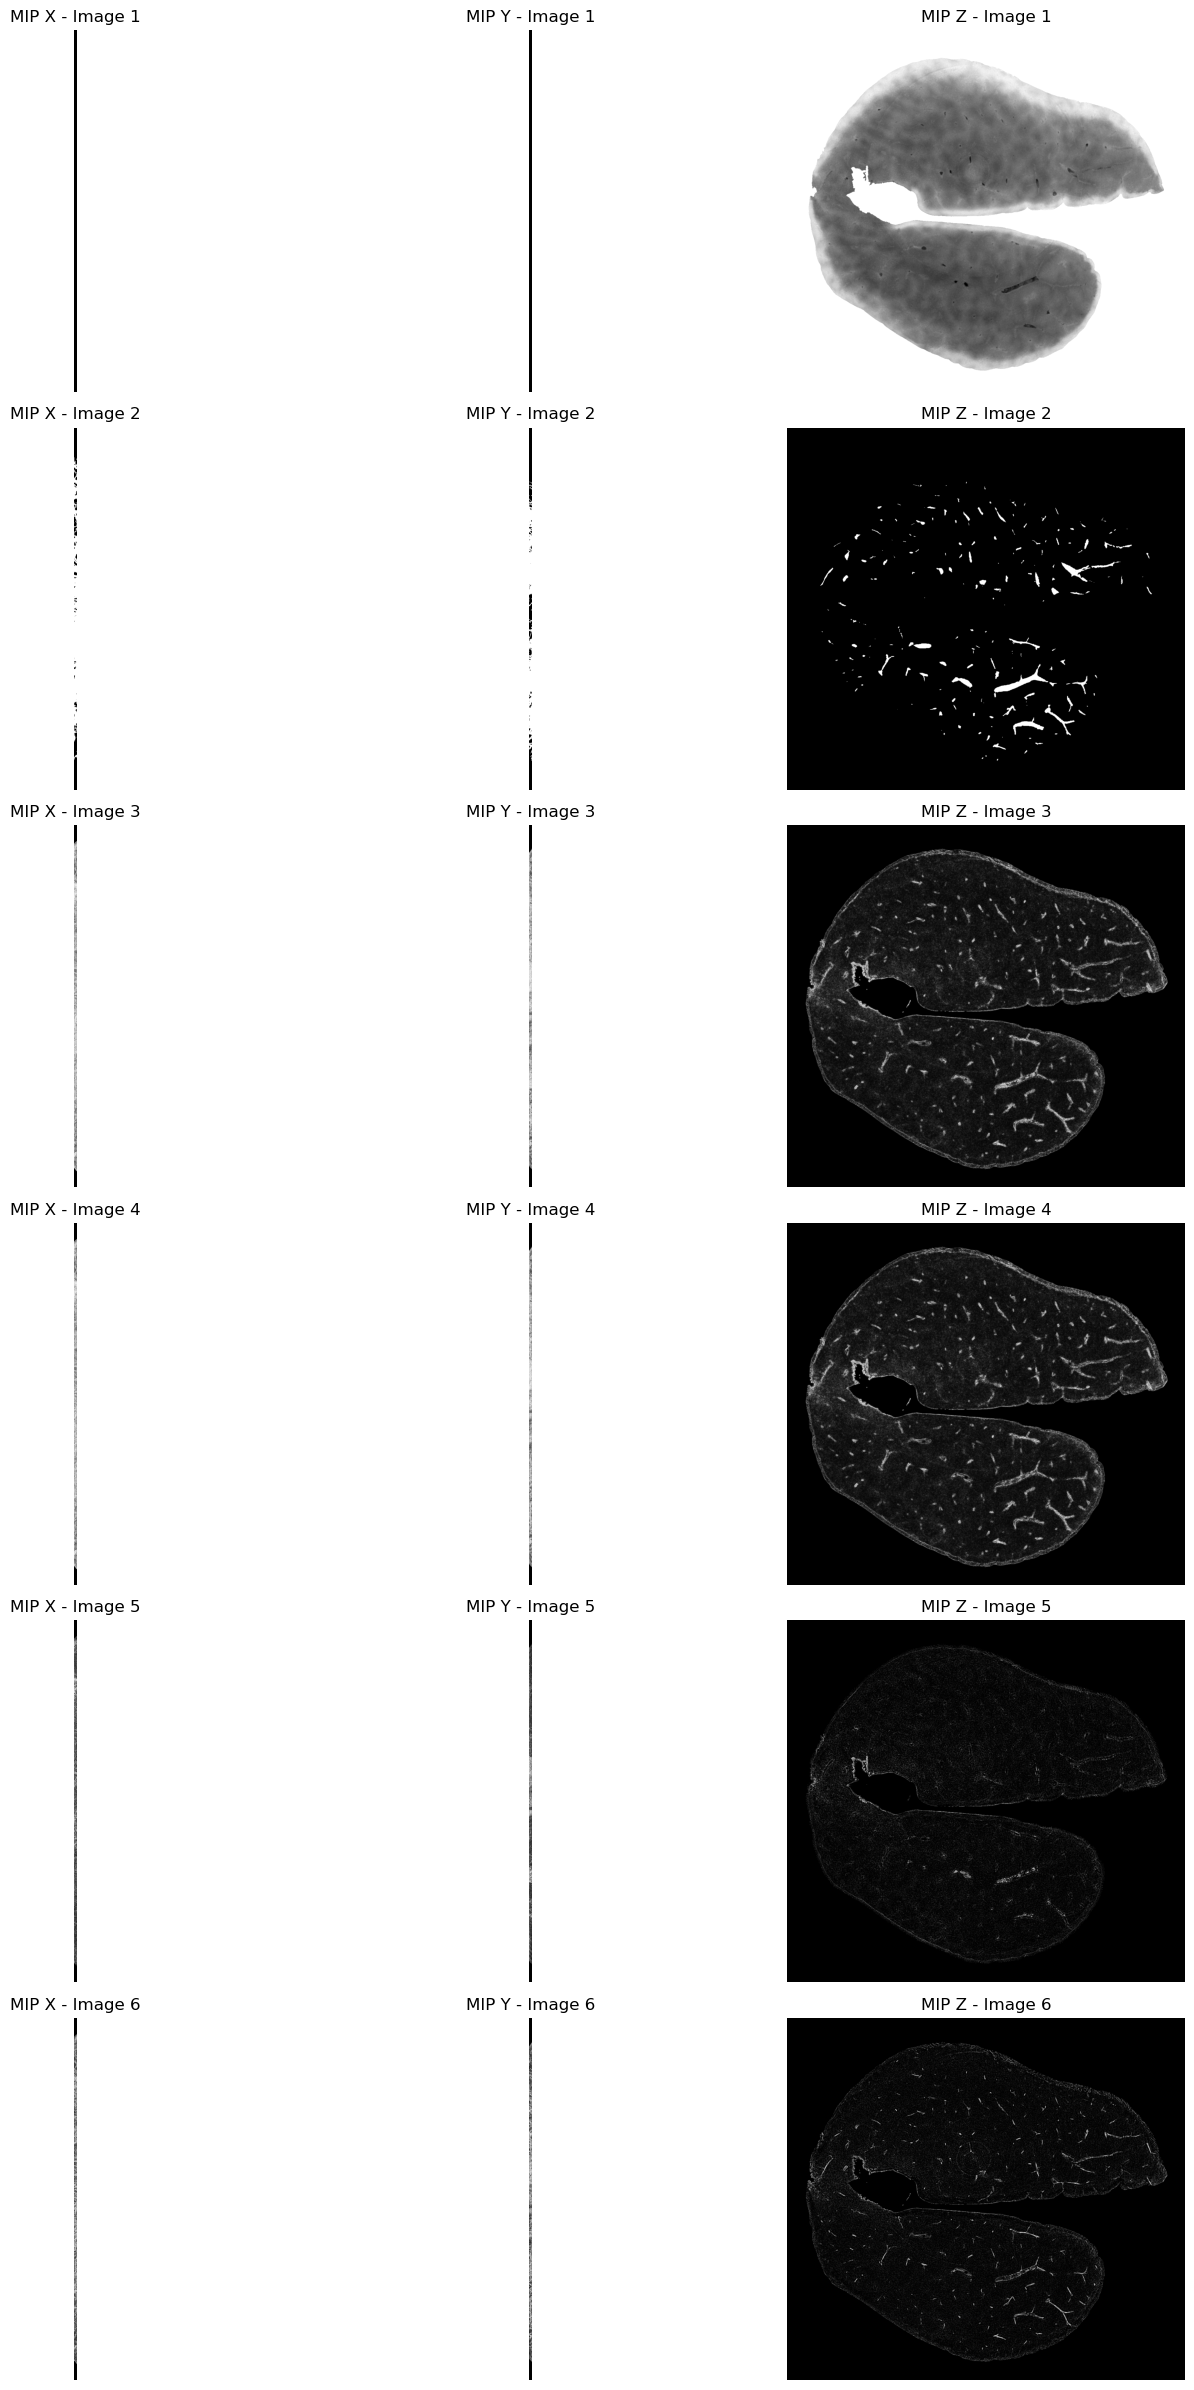

In [1]:
from utils.viewer import display_mip
from utils.loader import load
image1 = load('./data/raw/Data_B.tiff')
image2 = load('./data/raw/GT_B.tif')
image3 = load('./data/test/filtered_image1.nii')
image4 = load('./data/test/filtered_image2.nii')
image5 = load('./data/test/filtered_image3.nii')
image6 = load('./data/test/filtered_image4.nii')

display_mip([image1, image2, image3, image4, image5, image6])

### 3. Analyse données complètes

#### Taille appps1_cc

In [6]:
from utils.loader import load 
image = load('./data/raw/appps1_cc.nii')
print(image.shape)

Loading file ./data/raw/appps1_cc ...
File ./data/raw/appps1_cc loaded !
(544, 326, 500)


#### Visualisation appps1_cc 2D

(544, 326, 500, 1)
<class 'numpy.ndarray'>


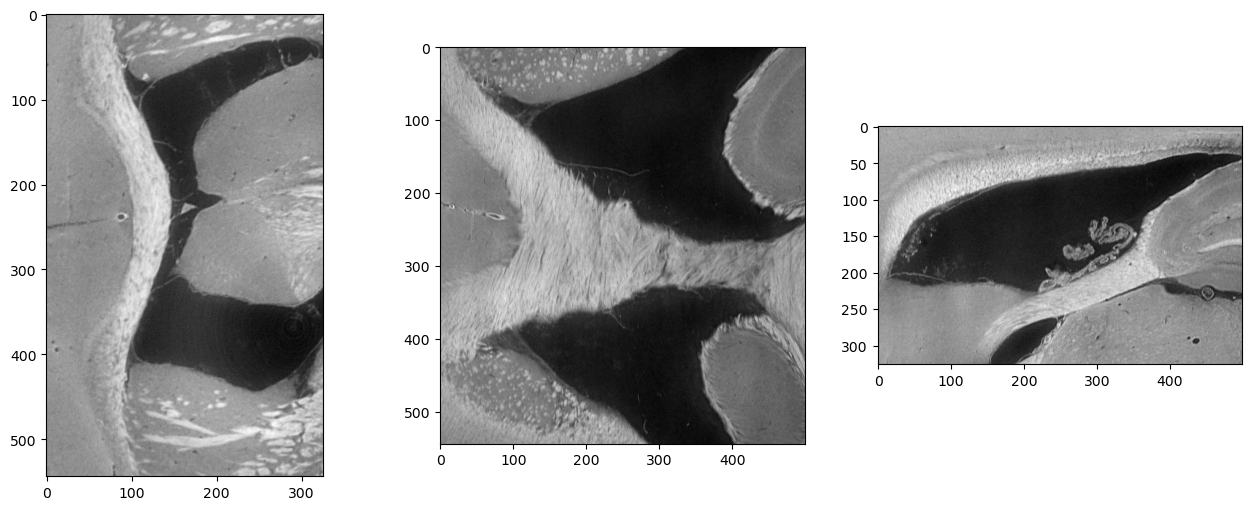

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# image_nii = nib.load('./data/appps1_cc.nii')
image_nii = nib.load('./data/raw/appps1_cc.nii')
images = image_nii.get_fdata() # numpy convertion
print(images.shape)
print(type(images))

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(images[:, :, 100], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(images[:, 100, :], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(images[100, :, :], cmap='gray')

#### Visualisation appps1_cc 3D

In [ ]:
from src.frangi import frangi_filter
from utils.loader import load, save


image = load('./data/raw/appps1_cc.nii', (200, 200, 200))
filtered_image1 = frangi_filter(-image[:, :, :50], scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=5)
filtered_image2 = frangi_filter(image[:, :, :50], scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=5)

save(filtered_image1, './data/test/filtered_image1.nii')
save(filtered_image2, './data/test/filtered_image2.nii')

In [5]:
from utils.viewer import display_mip
from utils.loader import load
image1 = load('./data/raw/appps1_cc.nii')
image2 = filtered_image1
image3 = filtered_image2
# image2 = load('./data/processed/data_gt.nii')
# image3 = load('./data/processed/data.nii')

display_mip([image1[:, :, :50], image2, image3])

Loading file appps1_cc ...
File appps1_cc loaded ! Volume shape: (544, 326, 500).


NameError: name 'filtered_image1' is not defined

---

### 4. Validation Frangi

#### 4.1 Test 2D

##### Visualisation

6.425131208409596e-06 0.008338935227632627


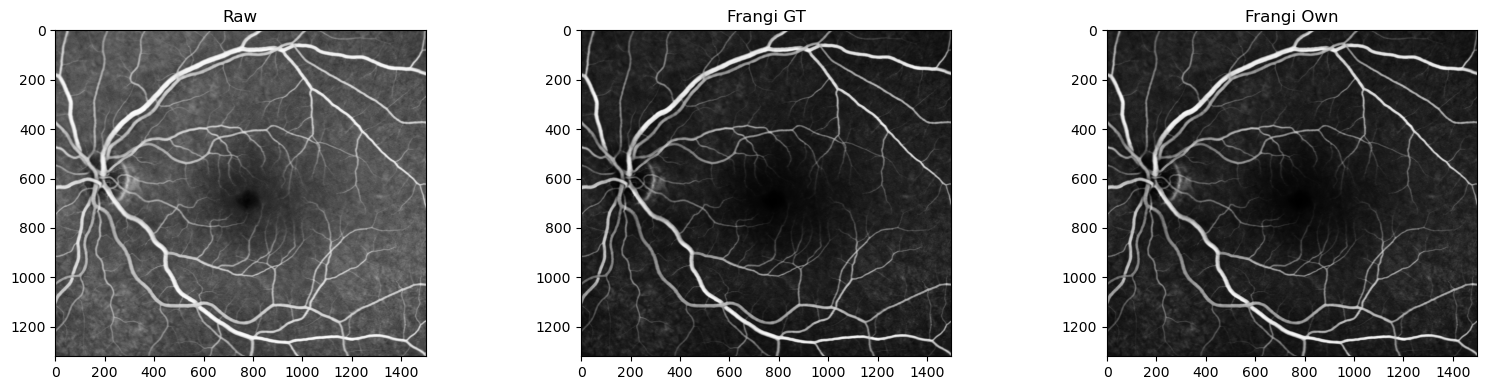

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from src.frangi import frangi_filter
from skimage import io, color


image = color.rgb2gray(io.imread('./data/test/retine.jpg'))
filtered_img1 = frangi(image, sigmas=np.arange(0, 10), alpha=0.5, beta=0.5, gamma=15)
filtered_img2 = frangi_filter(image, scales=np.arange(0, 10), alpha=0.5, beta=0.5, gamma=5)


plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Raw")
plt.subplot(1, 3, 2)
plt.imshow(filtered_img1, cmap='gray')
plt.title("Frangi GT")
plt.subplot(1, 3, 3)
plt.imshow(filtered_img2, cmap='gray')
plt.title("Frangi Own")


plt.tight_layout()
print(np.min(filtered_img1), np.max(filtered_img1))

##### Problème normalisation ???

6.4373016e-06 0.008338928


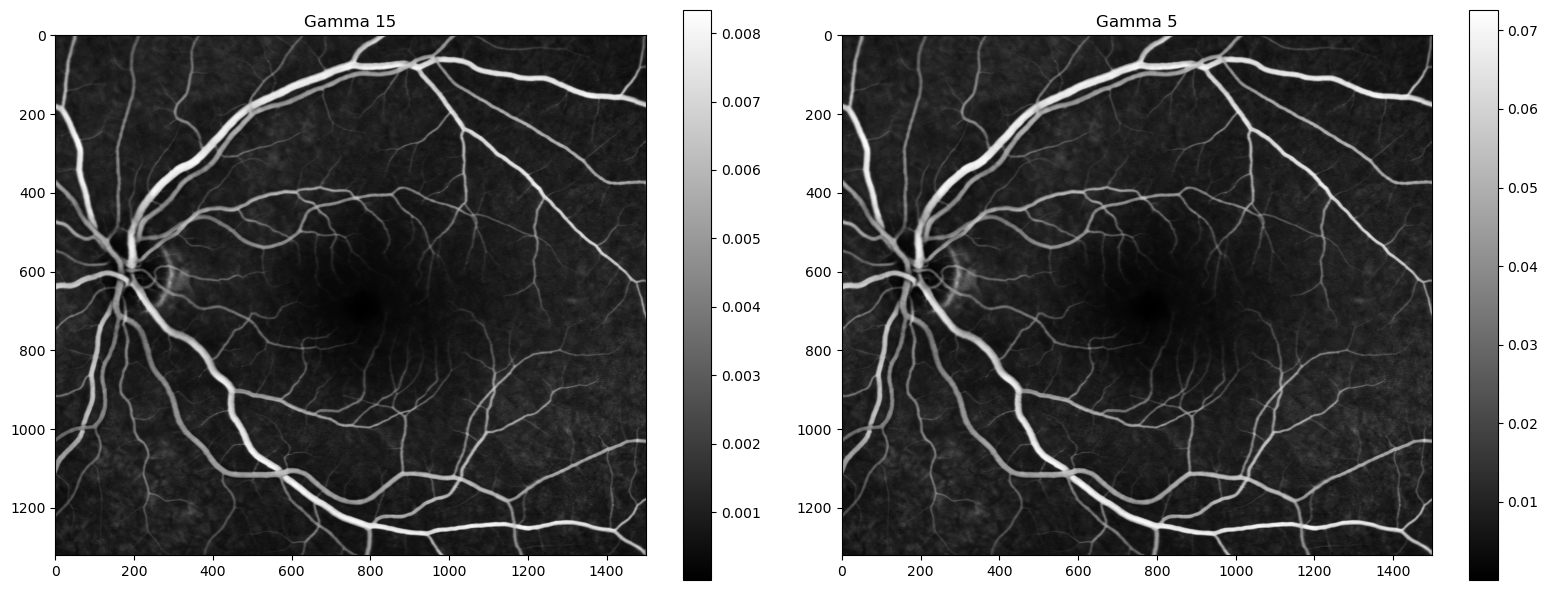

In [9]:
image = color.rgb2gray(io.imread('./data/test/retine.jpg'))
filtered_img1 = frangi_filter(image, scales=np.arange(0, 10), alpha=0.5, beta=0.5, gamma=15)
filtered_img2 = frangi_filter(image, scales=np.arange(0, 10), alpha=0.5, beta=0.5, gamma=5)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(filtered_img1, cmap='gray')
plt.title("Gamma 15")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(filtered_img2, cmap='gray')
plt.title("Gamma 5")
plt.colorbar()

plt.tight_layout()
print(np.min(filtered_img1), np.max(filtered_img1))

<span style="color: red; font-weight: bold">Faut-il normaliser ???</span>

#### Test 3D

##### Données test

In [3]:
from utils.loader import load 
image = load('./data/test/test_image.nii')
print(image.shape)

Loading file ./data/test/test_image ...
File ./data/test/test_image loaded !
(195, 155, 150)


##### Visualisation pre-filtrage

(195, 155, 150)
<class 'numpy.memmap'>


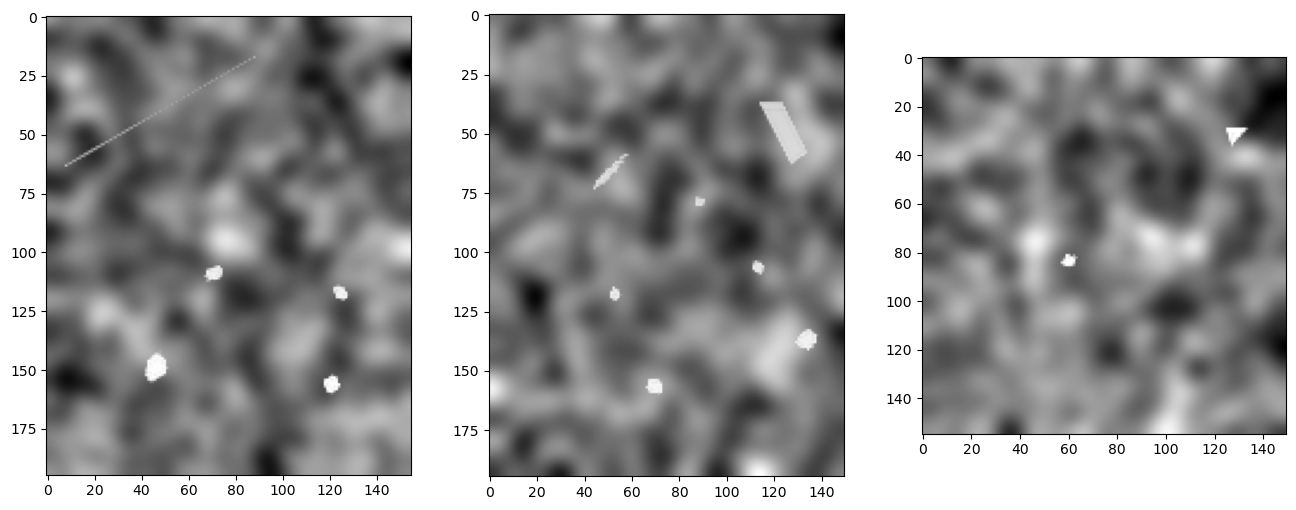

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# image_nii = nib.load('./data/appps1_cc.nii')
image_nii = nib.load('./data/test/test_image.nii')
images = image_nii.get_fdata() # numpy convertion
print(images.shape)
print(type(images))

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(images[:, :, 100], cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(images[:, 100, :], cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(images[100, :, :], cmap='gray')

##### Visualisation post-filtrage

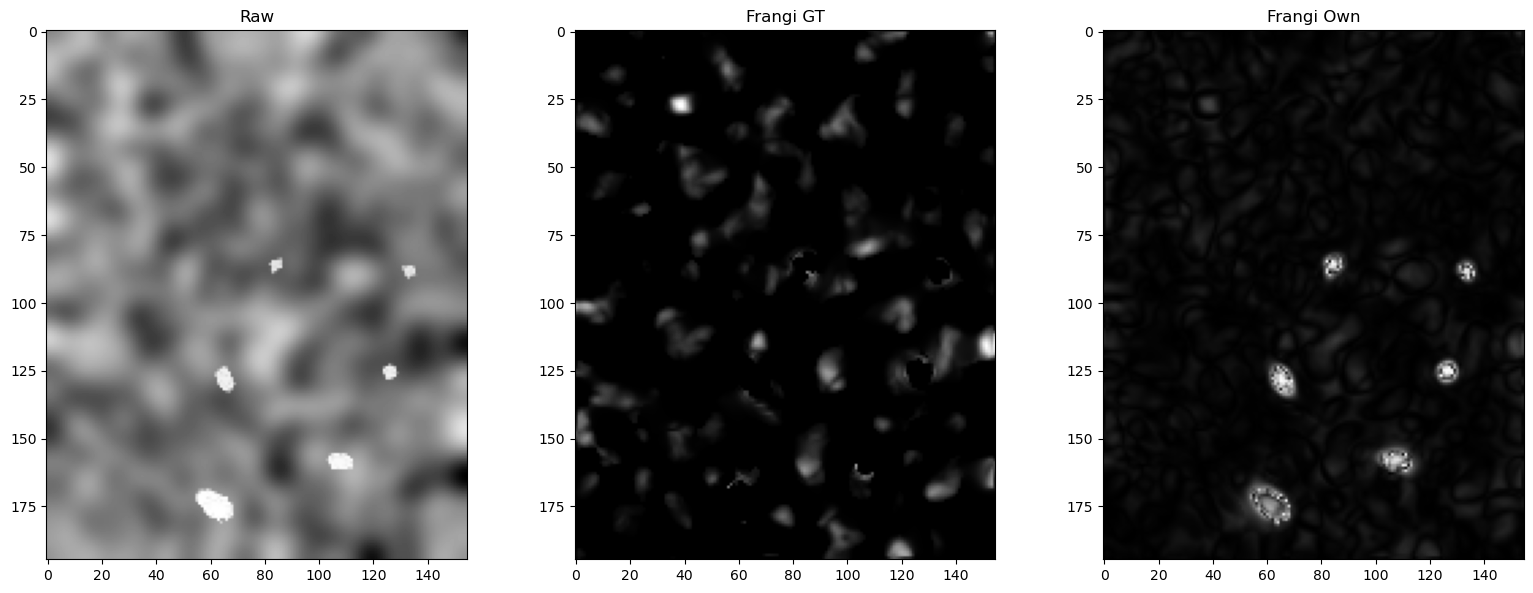

In [120]:
i=75
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(image[:, :, i], cmap='gray')
plt.title("Raw")
plt.subplot(1, 3, 2)
plt.imshow(filtered_img1[:, :, i], cmap='gray')
plt.title("Frangi GT")
plt.subplot(1, 3, 3)
plt.imshow(filtered_img2[:, :, i], cmap='gray')
plt.title("Frangi Own")

plt.tight_layout()

##### Visualisation post-filtrage 3D

In [17]:
from src.frangi import frangi_filter
from utils.loader import load, save
from time import time
filename = './data/test/test_image.nii'
image = load(filename)
filtered_image1 = frangi_filter(image, scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=5)
filtered_image2 = frangi_filter(image, scales=range(1, 10, 2), alpha=0.5, beta=0.5, gamma=15)

save(filtered_image1, './data/test/test_filtered_gamma5.nii')
save(filtered_image2, './data/test/test_filtered_gamma15.nii')

Loading file test_image ...
File test_image loaded ! Volume shape: (195, 155, 150).
Saving file ./data/test/test_filtered_gamma5 ...
File ./data/test/test_filtered_gamma5 saved!
Saving file ./data/test/test_filtered_gamma15 ...
File ./data/test/test_filtered_gamma15 saved!


Loading file test_image ...
File test_image loaded ! Volume shape: (195, 155, 150).
Loading file test_filtered_gamma5 ...
File test_filtered_gamma5 loaded ! Volume shape: (195, 155, 150).
Loading file test_filtered_gamma15 ...
File test_filtered_gamma15 loaded ! Volume shape: (195, 155, 150).


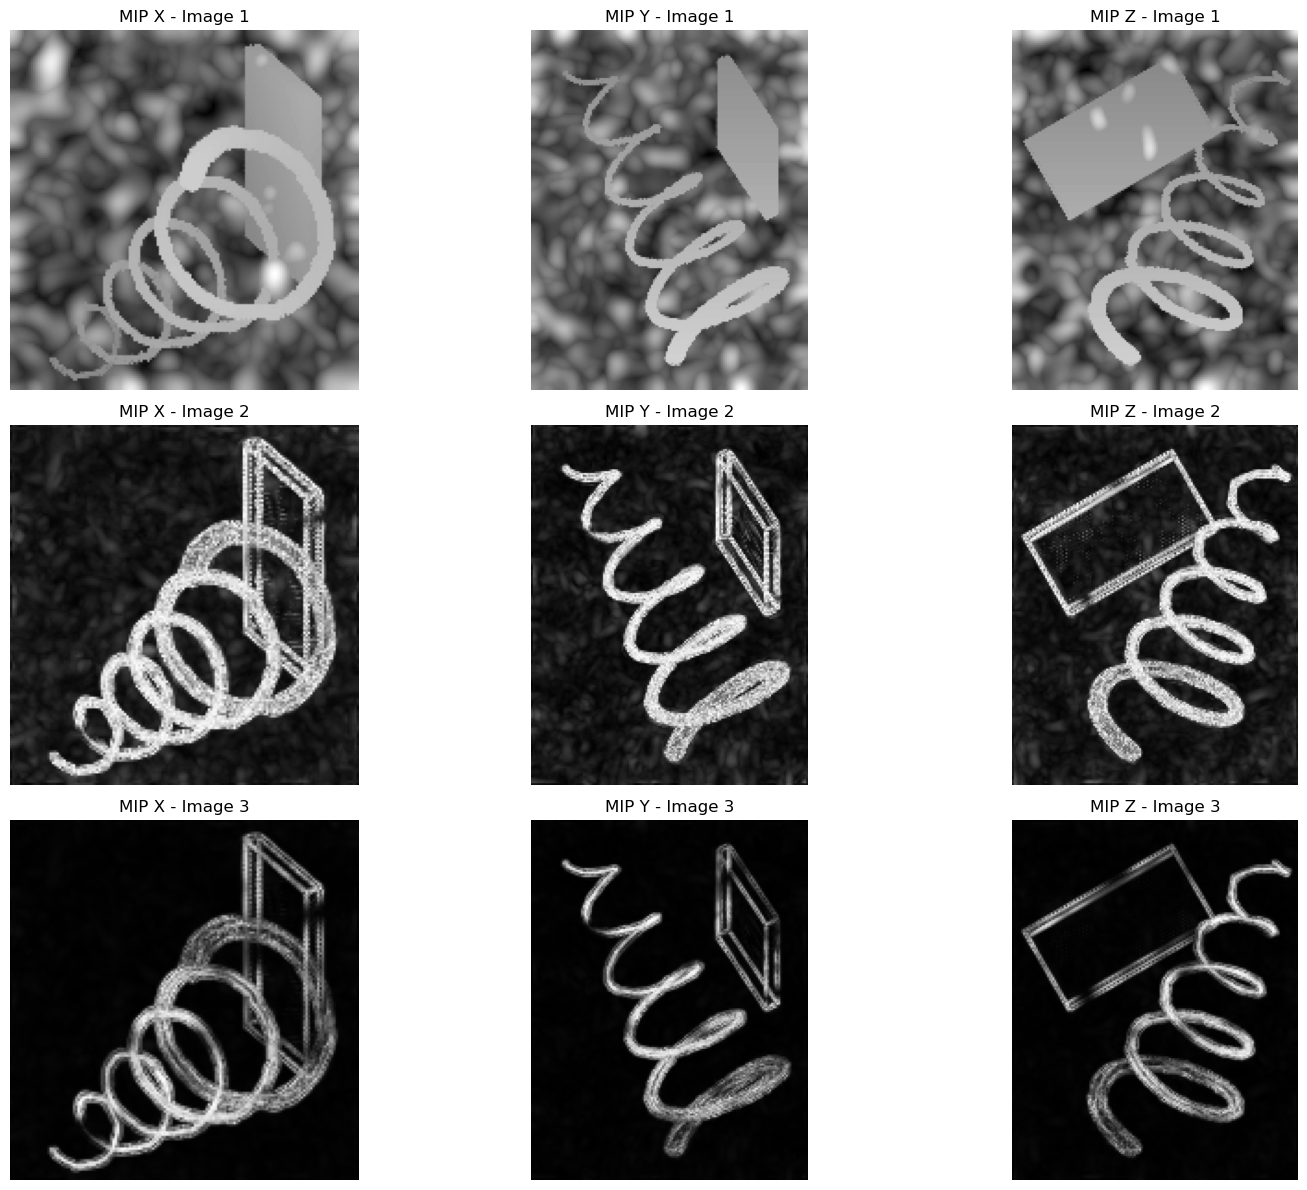

In [18]:
from utils.viewer import display_mip
from utils.loader import load
image1 = load('./data/test/test_image.nii')
image2 = load('./data/test/test_filtered_gamma5.nii')
image3 = load('./data/test/test_filtered_gamma15.nii')

display_mip([image1, image2, image3])